In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [124]:
data1 = pd.read_csv("dataset.csv")
data1.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [125]:
data1.describe(include="all")

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
count,400165,4.001650e+05,400165,400165,400165,223824.000000,400165,136234.000000,230482.000000
unique,400165,NaN,68028,2,3,NaN,176371,NaN,NaN
top,c807dc616930538ca193bdfe3f4af12a,NaN,b254341e78af2f1a,a,checkin,NaN,ffeae9d12ad83b25,NaN,NaN
freq,1,NaN,484,299019,223824,NaN,24,NaN,NaN
mean,NaN,2.016030e+13,NaN,NaN,NaN,97.190382,NaN,13.210109,2.992798
std,NaN,2.340996e+06,NaN,NaN,NaN,104.593714,NaN,13.271104,38.557292
min,NaN,2.016030e+13,NaN,NaN,NaN,10.000000,NaN,0.000000,1.000000
25%,NaN,2.016030e+13,NaN,NaN,NaN,20.000000,NaN,2.000000,1.000000
50%,NaN,2.016030e+13,NaN,NaN,NaN,50.000000,NaN,20.000000,1.000000
75%,NaN,2.016031e+13,NaN,NaN,NaN,150.000000,NaN,20.000000,2.000000


In [126]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400165 entries, 0 to 400164
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uuid             400165 non-null  object 
 1   timestamp        400165 non-null  float64
 2   session_id       400165 non-null  object 
 3   group            400165 non-null  object 
 4   action           400165 non-null  object 
 5   checkin          223824 non-null  float64
 6   page_id          400165 non-null  object 
 7   n_results        136234 non-null  float64
 8   result_position  230482 non-null  float64
dtypes: float64(4), object(5)
memory usage: 27.5+ MB


1. What is our daily overall clickthrough rate?

In [127]:
#data1['timestamp'] = data1['timestamp'].astype(str) 

In [128]:
# Number of Unique sessions
data1.session_id.nunique()

68028

In [129]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400165 entries, 0 to 400164
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uuid             400165 non-null  object 
 1   timestamp        400165 non-null  float64
 2   session_id       400165 non-null  object 
 3   group            400165 non-null  object 
 4   action           400165 non-null  object 
 5   checkin          223824 non-null  float64
 6   page_id          400165 non-null  object 
 7   n_results        136234 non-null  float64
 8   result_position  230482 non-null  float64
dtypes: float64(4), object(5)
memory usage: 27.5+ MB


In [130]:
# Convert the float timestamp to datetime for easy extraction of day(s)
data1['timestamp'] = pd.to_datetime(data1['timestamp'],format='%Y%m%d%H%M%S')

In [131]:
data1['Date']=pd.to_datetime(data1.timestamp, unit='d').dt.strftime('%Y-%m-%d')

In [132]:
data_new = data1.copy()

In [133]:
# just to see how one session appears in the data 
data1.loc[data1['session_id']== '78245c2c3fba013a']

# here only 1 action =  visitPage i.e. the click through rate for this session is 1/6

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position,Date
0,00000736167c507e8ec225bd9e71f9e5,2016-03-01 10:38:42,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN,2016-03-01
469,004690364c695f04b5d045913e1bdf7c,2016-03-01 10:39:16,78245c2c3fba013a,b,checkin,30.0,2f0e04bd56649f43,NaN,3.0,2016-03-01
17098,0af62216356759fea26313e155f70809,2016-03-01 10:39:26,78245c2c3fba013a,b,checkin,40.0,2f0e04bd56649f43,NaN,3.0,2016-03-01
31621,14601aeb2bf058af9380c1644e606e24,2016-03-01 10:39:06,78245c2c3fba013a,b,checkin,20.0,2f0e04bd56649f43,NaN,3.0,2016-03-01
80381,33922e14b6bb5e27823481a3c44ed462,2016-03-01 10:38:56,78245c2c3fba013a,b,checkin,10.0,2f0e04bd56649f43,NaN,3.0,2016-03-01
85270,36af0358f25155fb8978d5f50737d432,2016-03-01 10:38:46,78245c2c3fba013a,b,visitPage,NaN,2f0e04bd56649f43,NaN,3.0,2016-03-01


In [134]:
data1['session_id'].value_counts()

b254341e78af2f1a    484
593638dbb24d903a    305
549c7d24637bc68c    250
4264985570c2b41d    234
b1b9ad0b289027e1    223
                   ... 
eb94613dbd961d60      1
005b3b4e203de3f6      1
a2b701b7990a3d55      1
bda6f3204cb6857c      1
2d9a66c1c458b4db      1
Name: session_id, Length: 68028, dtype: int64

In [135]:
# Lets see how many days do we have data for

data1.Date.value_counts()

2016-03-03    60644
2016-03-02    60322
2016-03-01    59324
2016-03-07    52558
2016-03-04    45746
2016-03-08    44129
2016-03-06    41200
2016-03-05    36242
Name: Date, dtype: int64

In [136]:
# for daily click through rate (DCTR), we need to apply groupby on date for each day and aggregate
# no. of sessions, counts for visitPage

data2 = data1.groupby(
   ['Date', 'action'], as_index=False
).agg(
    {
         'session_id':['count']
        
    }
)

# DCTR for 2016-03-01 = 6654/(34296+18374+6654)

In [196]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        24 non-null     object
 1   action      24 non-null     object
 2   session_id  24 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 768.0+ bytes


In [138]:
data2.columns = ['date', 'action', 'session_id']
data2.head()

,date,action,session_id
0,2016-03-01,checkin,34296
1,2016-03-01,searchResultPage,18374
2,2016-03-01,visitPage,6654
3,2016-03-02,checkin,34728
4,2016-03-02,searchResultPage,18902


In [139]:
print(data1['action'].unique())
print(data1['action'].value_counts())

['searchResultPage' 'checkin' 'visitPage']
checkin             223824
searchResultPage    136234
visitPage            40107
Name: action, dtype: int64


In [140]:
# need to convert date into string so it gets through the function
data2.date = data2.date.astype('str')

In [141]:
# Define a function to calculate DTCR for any date of choice in place of x
def get_DTCR(x):
    data3 = data2[data2['date']==x]
    print(data3[data3['action']=='visitPage'].sum()[2]/data3['session_id'].sum())

In [142]:
# for example DTCR for March 1st 2016 is ~0.11
get_DTCR('2016-03-01')

0.11216371114557346


In [143]:
# creating a new dataset data_g to keep groups as well
data_g = data1.groupby(
   ['Date', 'action', 'group'], as_index=False
).agg(
    {
         'session_id':['count']
        
    }
)

In [144]:
#data preparation to be able to calculate DTCR
data_g.columns = ['date', 'action', 'group', 'session_id_count']
data_g['date'].astype('str')
data_g.head()

,date,action,group,session_id_count
0,2016-03-01,checkin,a,28518
1,2016-03-01,checkin,b,5778
2,2016-03-01,searchResultPage,a,12582
3,2016-03-01,searchResultPage,b,5792
4,2016-03-01,visitPage,a,5925


'''# Define a function to calculate DTCR for any date of choice in place of x
def get_DTCR(x,y):
    data_g1 = data_g[data_g['date']==x]
    data_g1 = data_g1[data_g1['group']==y]
    print(data_g1[data_g1['action']=='visitPage'].sum()[3]/data_g1['session_id_count'].sum())'''

In [145]:
## create a new dataset to store date wise DTCR for both groups
df = data1[['Date']]
df.sort_values(by='Date', inplace = True)
df.drop_duplicates(subset=['Date'], inplace=True)
df.reset_index(drop=True, inplace =True)
df

<ipython-input-145-56dc8feddb88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Date', inplace = True)
<ipython-input-145-56dc8feddb88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['Date'], inplace=True)


,Date
0,2016-03-01
1,2016-03-02
2,2016-03-03
3,2016-03-04
4,2016-03-05
5,2016-03-06
6,2016-03-07
7,2016-03-08


In [146]:
# to be used in loop
datelist = df['Date'].tolist()

In [147]:
a_val, b_val = list(), list()

for i in datelist: 
    data_g1 = data_g[data_g['date']== i]
    data_g1 = data_g1[data_g1['group']== 'a']
    a_value = data_g1[data_g1['action']=='visitPage'].sum()[3]/data_g1['session_id_count'].sum()
    a_val.append(a_value)
    
    data_g1 = data_g[data_g['date']== i]
    data_g1 = data_g1[data_g1['group']== 'b']
    b_value = data_g1[data_g1['action']=='visitPage'].sum()[3]/data_g1['session_id_count'].sum()
    b_val.append(b_value)

In [148]:
df['a_DTCR'] = a_val
df['b_DTCR'] = b_val

<ipython-input-148-b018e449bfbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['a_DTCR'] = a_val
<ipython-input-148-b018e449bfbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['b_DTCR'] = b_val


In [149]:
df

,Date,a_DTCR,b_DTCR
0,2016-03-01,0.125997,0.059273
1,2016-03-02,0.123903,0.061064
2,2016-03-03,0.121232,0.061424
3,2016-03-04,0.101648,0.073134
4,2016-03-05,0.099477,0.073770
5,2016-03-06,0.099612,0.070961
6,2016-03-07,0.096625,0.072646
7,2016-03-08,0.102561,0.068748


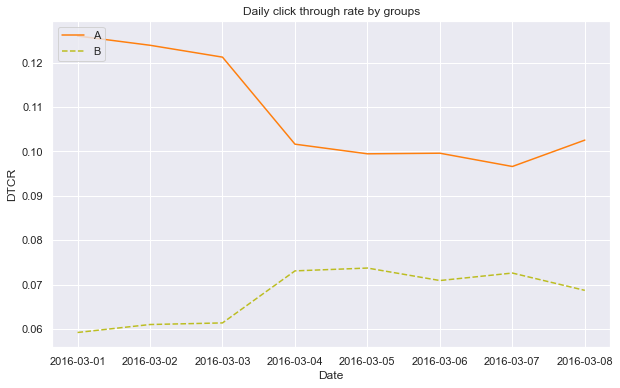

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import DateFormatter, DayLocator

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df.Date, df.a_DTCR, color='tab:orange', label='A')

ax.set_xlabel('Date')
ax.set_ylabel('DTCR')
ax.set_title('Daily click through rate by groups')
ax.grid(True)
ax.legend(loc='upper left');

#ax.xaxis.set_major_locator(DayLocator())
#ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

ax.plot(df.Date, df.b_DTCR, color='tab:olive', linestyle='--',label='B')
ax.legend(loc='upper left')

# Task 2 #######

In [151]:

data1.dropna(subset = ['result_position'], inplace=True)
data1.shape

(230482, 10)

In [152]:
data1.result_position.describe()

count    230482.000000
mean          2.992798
std          38.557292
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        4103.000000
Name: result_position, dtype: float64

In [153]:
# need to remove outliers from the data
# using interquartile ranges to remove outliers
Q1 = data1['result_position'].quantile(0.25)
Q3 = data1['result_position'].quantile(0.75)
IQR = Q3 - Q1

data = data1[~((data1['result_position'] < (Q1 - 1.5 * IQR)) | (data1['result_position'] > (Q3 + 1.5 * IQR)))]

In [154]:
# we can see now we don't have any absult value in 000's
data.result_position.describe()

count    197367.000000
mean          1.325520
std           0.619729
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: result_position, dtype: float64

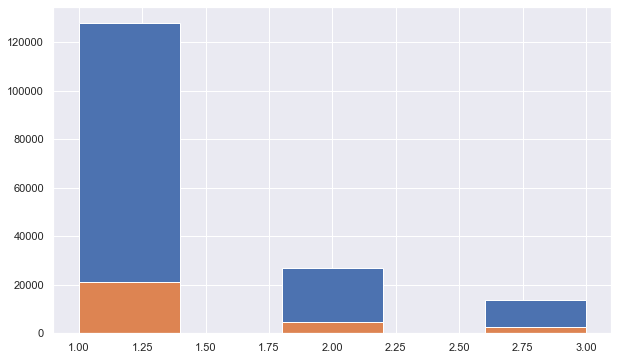

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

data[data['action']=='checkin']['result_position'].hist(bins = 5)
data[data['action']=='visitPage']['result_position'].hist(bins = 5)
plt.show()

# clearly in this chart we can see that most of the result positions are placed at 1.0

In [156]:
# when people visitPage the result position is ~74.3% times placed at 1.0
data[data['action']=='visitPage']['result_position'].value_counts(normalize=True)

1.0    0.743384
2.0    0.169842
3.0    0.086774
Name: result_position, dtype: float64

In [157]:
# when result position is 1 ~14.2% people visitPage
data[data['result_position']==1.0]['action'].value_counts(normalize=True)

checkin      0.857634
visitPage    0.142366
Name: action, dtype: float64

In [158]:
# when result position is 1 ~15.2% people visitPage
data[data['result_position']==2.0]['action'].value_counts(normalize=True)

checkin      0.847132
visitPage    0.152868
Name: action, dtype: float64

In [159]:
# when result position is 1 ~15.2% people visitPage
data[data['result_position']==3.0]['action'].value_counts(normalize=True)

checkin      0.847111
visitPage    0.152889
Name: action, dtype: float64

clearly, even though most result_positions are at 1.0, the visit page conversion is better when result_position is 2 or 3 

In [162]:
data_new['n_results'].unique()

array([  5.,  10.,  nan,  15.,  20.,   9.,   2.,   3.,   0.,  19.,   4.,
        13.,  18.,   1.,  16.,  12.,   6.,  11.,  37.,  17.,   8., 100.,
        14.,   7., 141.,  23.,  45.,  50., 102.,  58.,  99.,  78.,  64.,
       179.,  66., 500.,  57.,  25.,  21., 486., 236.,  36., 289., 109.,
        22.,  24., 168.,  59., 349.,  39.,  80.,  81.,  32.,  29.,  47.,
       136., 108., 119.,  31., 248.,  28., 277.,  33., 129., 250.,  92.,
        61.,  40.,  30.,  43., 436.,  67., 126., 299., 114.,  35.,  27.,
       499., 440., 235., 181., 105., 149.,  63.,  77., 155.,  34., 106.,
       112., 409., 477.,  44.,  97.])

# Task3

In [164]:
# for daily change, apply another loop on datelist similar to Q1. 
z_r=data_new[data_new['n_results']==0].groupby(['Date' , 'group']).count().rename(columns={'uuid' : 'zero_results'}).iloc[: , 0:1]
z_r

zero_results
Date       group              
2016-03-01 a              2350
           b              1097
2016-03-02 a              2524
           b              1065
2016-03-03 a              2371
           b              1072
2016-03-04 a              2068
           b               947
2016-03-05 a              1535
           b               907
2016-03-06 a              1599
           b               975
2016-03-07 a              2316
           b              1144
2016-03-08 a              2139
           b              1018

In [166]:
z_r['zero_results_rate']=z_r['zero_results']/data_new.count()[0]
z_r

zero_results  zero_results_rate
Date       group                                 
2016-03-01 a              2350           0.005873
           b              1097           0.002741
2016-03-02 a              2524           0.006307
           b              1065           0.002661
2016-03-03 a              2371           0.005925
           b              1072           0.002679
2016-03-04 a              2068           0.005168
           b               947           0.002367
2016-03-05 a              1535           0.003836
           b               907           0.002267
2016-03-06 a              1599           0.003996
           b               975           0.002436
2016-03-07 a              2316           0.005788
           b              1144           0.002859
2016-03-08 a              2139           0.005345
           b              1018           0.002544

# Task4

In [170]:
z_r=data_new.groupby(['Date' , 'session_id']).count().rename(columns={'uuid' : 'zero_results'}).iloc[: , 0:1
                                                                                                    ]
z_r

zero_results  timestamp
Date       session_id                               
2016-03-01 000936ae06d62383             1          1
           001544bc03fac3e8             2          2
           001a3950cd4ac6c6             5          5
           001e2d0e159172d2             3          3
           0022bba0634595b9             1          1
...                                   ...        ...
2016-03-08 ffdf5d155e9b5c19            20         20
           ffdfd6a8ffbbee8a             1          1
           ffe1a14d4565573d            17         17
           fffa387663722d38             1          1
           fffac2c4111308d0             1          1

[68111 rows x 2 columns]

In [187]:
lvR3.columns.tolist()

[('timestamp', 'amin'), ('timestamp', 'amax')]

In [193]:
alvRl = data_new.groupby(['session_id']).agg({'timestamp' : [np.min, np.max]})
alvRl[('timestamp', 'RecLen')] = (alvRl[('timestamp', 'amax')] - alvRl[('timestamp', 'amin')]) / pd.Timedelta(days=1)
session_length=alvRl[('timestamp', 'RecLen')]

In [194]:
session_length

session_id
0000cbcb67c19c45    0.000000
0001382e027b2ea4    0.003507
0001e8bb90445cb2    0.005035
000216cf18ae1ab1    0.000671
000527f711d50dfc    0.000000
                      ...   
fffa5a2bcaf090c4    0.000000
fffa88acebf831c8    0.005162
fffac2c4111308d0    0.000000
fffb978cc690214c    0.002037
ffff9adcd8f302d6    0.003785
Name: (timestamp, RecLen), Length: 68028, dtype: float64

# Visualizing the relationship session_length and checkin(How many seconds the page has been open for.)

In [197]:
data_new['checkin'].unique()

array([ nan,  30.,  60., 180., 240., 150.,  10.,  20.,  50.,  90.,  40.,
       120., 360., 300., 210., 420.])

In [200]:
data_new['checkin'].value_counts

<bound method IndexOpsMixin.value_counts of 0           NaN
1           NaN
2          30.0
3          60.0
4          30.0
          ...  
400160    120.0
400161     10.0
400162      NaN
400163      NaN
400164     30.0
Name: checkin, Length: 400165, dtype: float64>